In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Learnerea\Tables\PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
genuine = df[df['isFraud']==0]
fraud = df[df['isFraud']==1]
genuine = genuine.sample(n=80000)

df = pd.concat([genuine,fraud],axis=0)
display(df.shape)
display(df.groupby('isFraud').count()[['step']])

(88213, 11)

,step
isFraud,
0,80000
1,8213


In [4]:
df.to_excel(r"D:\Learnerea\Tables\to_build_the_model.xlsx",index=False)

C:\Users\smrvr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='isFraud', ylabel='count'>

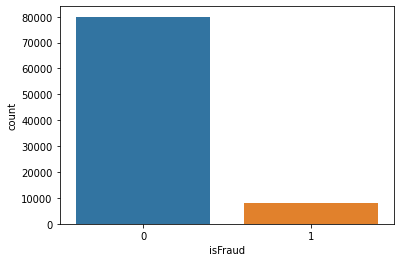

In [5]:
sns.countplot(df.isFraud)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
new_df = df.drop(columns=['nameOrig','nameDest'],axis=1)
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
498082,20,CASH_OUT,21921.31,10483.00,0.00,426453.42,412238.63,0,0
1976880,178,CASH_OUT,438387.50,0.00,0.00,634039.54,1072427.05,0,0
1978837,179,CASH_IN,233226.52,0.00,233226.52,3757147.74,3523921.22,0,0
1759974,161,CASH_OUT,209362.22,273672.23,64310.02,11147051.47,11710733.34,0,0
1368878,138,PAYMENT,7521.75,0.00,0.00,0.00,0.00,0,0


In [8]:
dummies = pd.get_dummies(df['type'])

processedDf = pd.concat([new_df.drop('type',axis=1),dummies],axis=1)

In [9]:
frauds = processedDf[processedDf['isFraud']==1]
genuine = processedDf[processedDf['isFraud']==0]

independent = processedDf.drop('isFraud',axis=1)
dependent = processedDf['isFraud']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(processedDf.drop('isFraud',axis=1), processedDf['isFraud'], test_size=0.30, random_state=True)

In [11]:
logit = LogisticRegression()

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     23981
           1       0.81      0.73      0.77      2483

    accuracy                           0.96     26464
   macro avg       0.89      0.86      0.87     26464
weighted avg       0.96      0.96      0.96     26464



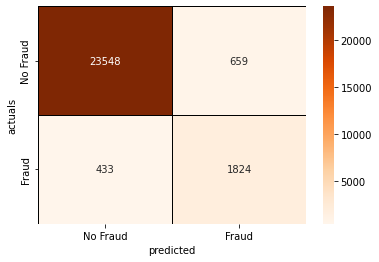

In [12]:
logit.fit(X_train,y_train)
prediction = logit.predict(X_test)
accuracy_test = confusion_matrix(prediction,y_test)
sns.heatmap(accuracy_test,annot=True,cmap='Oranges',fmt='d',linecolor='Black',linewidths=0.5)
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicted")
plt.ylabel("actuals")

print(classification_report(y_test,prediction))

# Over-Sampling Minority Class

In [13]:
genuine.shape

(80000, 13)

In [14]:
fraudsOver = frauds.sample(n=genuine.shape[0],replace=True)
fraudsOver.shape

(80000, 13)

In [15]:
processedDfOver = pd.concat([genuine,fraudsOver],axis=0)
processedDfOver.shape

(160000, 13)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(processedDfOver.drop('isFraud',axis=1),processedDfOver['isFraud'], test_size=0.30, random_state=True)

In [17]:
logit.fit(X_train,y_train)

LogisticRegression()

In [18]:
prediction = logit.predict(X_test)

Text(33.0, 0.5, 'actuals')

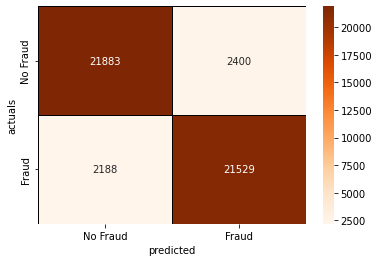

In [19]:
accuracy_test = confusion_matrix(prediction,y_test)
sns.heatmap(accuracy_test,annot=True,cmap='Oranges',fmt='d',linecolor='Black',linewidths=0.5)
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [20]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     24071
           1       0.91      0.90      0.90     23929

    accuracy                           0.90     48000
   macro avg       0.90      0.90      0.90     48000
weighted avg       0.90      0.90      0.90     48000



# Under-Sampling Majority Class

In [21]:
genuineUnder = genuine.sample(frauds.shape[0])
genuineUnder.shape

(8213, 13)

In [22]:
processedDfUnder = pd.concat([genuineUnder,frauds],axis=0)
processedDfUnder.shape

(16426, 13)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(processedDfUnder.drop('isFraud',axis=1),processedDfUnder['isFraud'], test_size=0.30, random_state=True)

In [24]:
logit.fit(X_train,y_train)

LogisticRegression()

In [25]:
prediction = logit.predict(X_test)

Text(33.0, 0.5, 'actuals')

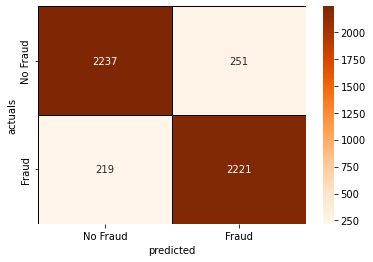

In [26]:
accuracy_test = confusion_matrix(prediction,y_test)
sns.heatmap(accuracy_test,annot=True,cmap='Oranges',fmt='d',linecolor='Black',linewidths=0.5)
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2456
           1       0.91      0.90      0.90      2472

    accuracy                           0.90      4928
   macro avg       0.90      0.90      0.90      4928
weighted avg       0.90      0.90      0.90      4928



# SMOTE - Synthetic Minority Over-Sampling Technique

In [61]:
# pip install imbalanced-learn

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
smote = SMOTE()

In [64]:
independent = processedDf.drop('isFraud',axis=1)
dependent = processedDf['isFraud']

In [65]:
x_smote, y_smote = smote.fit_resample(independent,dependent)

In [66]:
display(independent.shape)
display(x_smote.shape)

display(dependent.shape)
display(y_smote.shape)

(88213, 12)

(160000, 12)

(88213,)

(160000,)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=0.30, random_state=True)

In [68]:
smote_logistic = LogisticRegression()

In [69]:
smote_logistic.fit(X_train,y_train)

LogisticRegression()

In [70]:
prediction = smote_logistic.predict(X_test)

Text(33.0, 0.5, 'actuals')

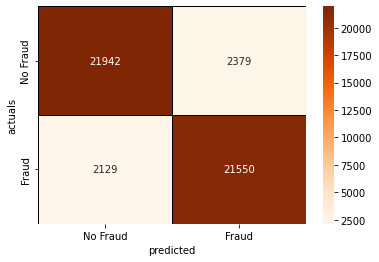

In [71]:
accuracy_test = confusion_matrix(prediction,y_test)
sns.heatmap(accuracy_test,annot=True,cmap='Oranges',fmt='d',linecolor='Black',linewidths=0.5)
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [72]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     24071
           1       0.91      0.90      0.91     23929

    accuracy                           0.91     48000
   macro avg       0.91      0.91      0.91     48000
weighted avg       0.91      0.91      0.91     48000



In [73]:
with open("smote_logistic.pkl","wb") as file:
    pickle.dump(smote_logistic,file)

# K-Fold Cross Validation

In [38]:
kfold = StratifiedKFold(n_splits=5,shuffle=True)

In [39]:
score = []
conf_met = []
class_rep = []

for train_index, test_index in kfold.split(independent,dependent):
    x_train, x_test = independent.iloc[train_index], independent.iloc[test_index]
    y_train, y_test = dependent.iloc[train_index], dependent.iloc[test_index]
    
    logit.fit(x_train,y_train)
    prediction = logit.predict(x_test)
    score.append(logit.score(x_test,y_test))
    conf_met.append(confusion_matrix(prediction,y_test))
    class_rep.append(classification_report(prediction,y_test))

In [40]:
for i in class_rep:
    print(i)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16131
           1       0.73      0.79      0.76      1512

    accuracy                           0.96     17643
   macro avg       0.86      0.88      0.87     17643
weighted avg       0.96      0.96      0.96     17643

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16155
           1       0.73      0.81      0.77      1488

    accuracy                           0.96     17643
   macro avg       0.86      0.89      0.87     17643
weighted avg       0.96      0.96      0.96     17643

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     16140
           1       0.74      0.81      0.77      1503

    accuracy                           0.96     17643
   macro avg       0.86      0.89      0.87     17643
weighted avg       0.96      0.96      0.96     17643

              preci

# Ensamble Technique

In [41]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [42]:
x_train, x_test, y_train, y_test = train_test_split(independent,dependent,test_size=0.2,random_state=20)

In [74]:
model = BalancedRandomForestClassifier(n_estimators=100,random_state=42)

In [44]:
model.fit(x_train,y_train)

C:\Users\smrvr\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\smrvr\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

In [45]:
model.score(x_train,y_train)

0.9897265126824429

In [46]:
model.score(x_test,y_test)

0.9880405826673468

In [54]:
prediction = model.predict(x_test)

In [55]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15997
           1       0.89      1.00      0.94      1646

    accuracy                           0.99     17643
   macro avg       0.94      0.99      0.97     17643
weighted avg       0.99      0.99      0.99     17643



In [53]:
import pickle

In [56]:
with open("ensemble_model.pkl","wb") as file:
    pickle.dump(model,file)

In [57]:
import os

In [58]:
os.getcwd()

'C:\\Users\\smrvr'